In [1]:
import pandas as pd

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Quick view
print(df.head())
print(df['Churn'].value_counts())  # Check churn distribution

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Drop non-informative ID column
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (handle errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values (e.g., TotalCharges with 0 or mean)
df['TotalCharges'].fillna(0, inplace=True)

# Label Encoding for Binary columns (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# Preview encoded data
print(df.head())


   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  ...  TechSupport_Yes  \
0           29.85         29.85      0        False  ...            False   
1           56.95       1889.50      0         True  ...            False   
2           53.85        108.15      1         True  ...            False   
3           42.30       1840.75      0         True  ...             True   
4           70.70        151.65      1        False  ...            False   

   StreamingTV_No internet service  StreamingTV_Ye

/tmp/ipython-input-2-2759693032.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [3]:
# Show columns with non-numeric data types
non_numeric_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Columns to encode:\n", non_numeric_cols)


Columns to encode:
 Index(['gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [4]:
# Convert all boolean columns to integers
df[non_numeric_cols] = df[non_numeric_cols].astype(int)


In [5]:
# Replace 'No internet service' and similar with just 'No'
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)


In [6]:
# Again get object type columns (after previous cleaning)
remaining_obj_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=remaining_obj_cols, drop_first=True)


In [7]:
print(df.dtypes)  # Should now be all int or float
print(df.head())


SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [8]:
# Target column
y = df['Churn']

# Feature columns (all except Churn)
X = df.drop('Churn', axis=1)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 30)
y shape: (7043,)


In [9]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,1,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.model_selection import StratifiedKFold


In [15]:
from sklearn.model_selection import GridSearchCV


In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1.0, 10.0]}, scoring='accuracy')

In [19]:
print("Best Score (Avg CV Accuracy):", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# See all fold scores for each param
cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results[['params', 'mean_test_score', 'std_test_score']])


Best Score (Avg CV Accuracy): 0.8044876887218531
Best Parameters: {'C': 0.1}
        params  mean_test_score  std_test_score
0   {'C': 0.1}         0.804488        0.007964
1   {'C': 1.0}         0.803210        0.007210
2  {'C': 10.0}         0.803352        0.007325


In [20]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [21]:
# Decision Tree with GridSearch
# ------------------------------
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}


In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       dt_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(X_test)


In [27]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
 ##Random Forest with GridSearch
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)


In [29]:
# Metrics function
# ------------------------------
def print_metrics(model_name, y_true, y_pred):
    print(f"\n=== {model_name} Metrics ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [30]:
# Results
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [32]:
from sklearn.metrics import confusion_matrix


In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report,accuracy_score


In [38]:
# Decision Tree Results
dt_cm = confusion_matrix(y_test, dt_preds)
print_metrics("Decision Tree", y_test, dt_preds)



=== Decision Tree Metrics ===
Accuracy: 0.8019872249822569
Precision: 0.706140350877193
Recall: 0.4316353887399464
F1-score: 0.5357737104825291
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.43      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [39]:
# Random Forest Results
rf_cm = confusion_matrix(y_test, rf_preds)
print_metrics("Random Forest", y_test, rf_preds)



=== Random Forest Metrics ===
Accuracy: 0.8119233498935415
Precision: 0.6942446043165468
Recall: 0.517426273458445
F1-score: 0.5929339477726574
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [43]:
import matplotlib.pyplot as plt

import seaborn as sns


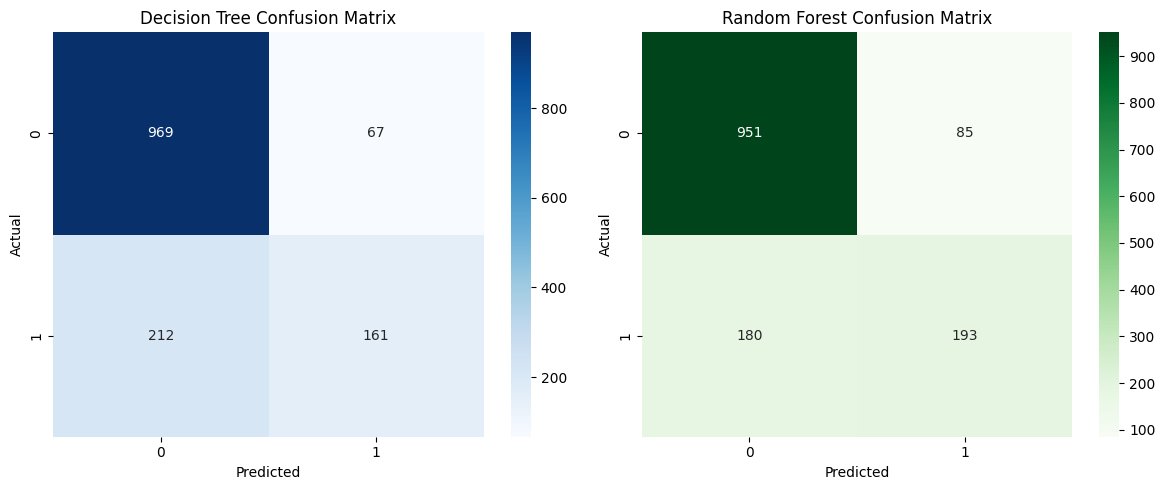

In [47]:

# Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
